In [179]:
# implementacion del paper theo2005
# anlytical model for tilted coils


import pandas as pd
from scipy import integrate
from scipy import special
import numpy as np
import math
import matplotlib.pyplot as plt
# Examples

# Compute the double integral of x * y**2 over the box x ranging from 0 to 2 and y ranging from 0 to 1.

# from scipy import integrate
# f = lambda y, x: x*y**2
# integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
#     (0.6666666666666667, 7.401486830834377e-15)



frec=100
w=2*np.pi*frec
mu0=1.26e-6

## tabla1

r1=2e-3
r2=4e-3
l=2e-3
N=400
l0=1e-3
n=N/((r2 -r1)*l)

sigma1=18.72e6
mu1=1


tita=math.radians(90)
x0=0
y0=0

coil=[r1,r2,l,n,tita,x0,y0,l0]


In [180]:
def ji(k,r1,r2):
    """ funcion auxiliar"""
    return     integrate.quad(lambda x: x*special.jv(1,x) ,k*r1,k*r2)[0]

def cquad(func, a, b, **kwargs):
    """ funcion auxiliar"""
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = integrate.quad(real_func, a, b, **kwargs)
    imag_integral = integrate.quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0])

def L0(coil,lmax=1000):
    mu0=4*3.14*1e-7
    r1=coil[0]
    r2=coil[1]
    dh=coil[2]
    aint=(mu0*2*np.pi*N**2)/(((r2-r1)*dh)**2)
    return aint*cquad(lambda k:(k*dh + np.exp(-k*dh) - 1)*(ji(k,r1,r2)/k**3)**2,0,lmax)

def delta_z(coil,frec,lim=1000):
    #f = lambda v, u: (np.abs(hs(u,v,coil))**2)*R(u,v)/a(u,v)
    w=2*np.pi*frec
    f_re= lambda v, u: np.real((np.abs(hs(u,v,coil))**2)*R(u,v,w)/a(u,v))
    f_im=  lambda v, u: np.imag((np.abs(hs(u,v,coil))**2)*R(u,v,w)/a(u,v))

    dz_re=1j*8*w*mu0*n**2*integrate.dblquad(f_re,0, lim, lambda u: 0, lambda u: lim)[0]
    dz_im=1j*8*w*mu0*n**2*integrate.dblquad(f_im,0, lim, lambda u: 0, lambda u: lim)[0]
    return dz_re+1j*dz_im

def a(u,v):
    return np.sqrt(u**2+ v**2)

def R(u,v,w):
    a1=a(u,v)
    b1=np.sqrt(a1**2 + 1j*w*mu1*mu0*sigma1)/mu1 
    r=(a1-b1)/(a1+b1)  
    return r

def hs(u,v,coil):
    tita=coil[4]
    h=1j*M(psi(u,v,tita)*r1,psi(u,v,tita)*r2)*expsin(u,v,coil)/psi(u,v,tita)**3
    return(h)
    
def psi(u,v,tita):
    ps=u*np.sin(tita) + 1j*a(u,v)*np.cos(tita) 
    return ps

def expsin(u,v,coil):
    r1,r2,l,n,tita,x0,y0,l0=coil
    d= l0 + r2*np.sin(np.abs(tita)) + (l/2)*np.cos(tita)
    y=np.exp(1j*psi(u,v,tita)*l/2 - a(u,v)*d)-np.exp(-1j*psi(u,v,tita)*l/2 - a(u,v)*d)
    return y/2j

def zum(klen,z1,z2):
    x=[]
    for k in range(0,klen):
        x.append((special.iv(2*k+1,z2)-special.iv(2*k+1,z1))*(-1)**k)
    return 2*np.array(x).sum()

def M(z1,z2,klen=10):

    y=z2*special.iv(0,z2)-z1*special.iv(0,z1)-zum(klen,z1,z2)
    
    return y

In [192]:
lo=L0(coil).real
lo/1e-6

740.8929916192906

In [182]:
X0=2*np.pi*frecs*lo

In [161]:
# convergencia de la integral

nlim=np.logspace(1,5,20)
conv=[delta_z(coil,1000,x) for x in nlim]

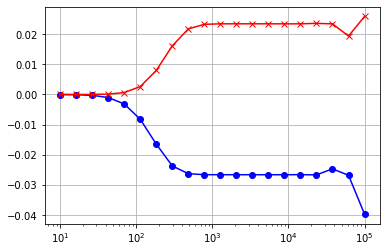

In [162]:
plt.semilogx(nlim,np.array(conv).imag,'-ob')
plt.semilogx(nlim,np.array(conv).real,'-xr')
plt.grid(True)

In [ ]:
# lim=1000

In [183]:
delta_z(coil,100)

(0.0007752559659958656-0.0003709975888109492j)

In [ ]:
# barrido en angulo

In [125]:
titas=np.arange(0,10)*10
dzs=[]
for tita in titas:
    coil=[r1,r2,l,n,math.radians(tita),x0,y0,l0]
    dzs.append(delta_z(coil,100))

    


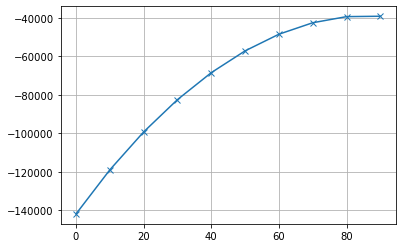

In [126]:
plt.plot(titas,np.array(dzs).imag,'-x')
plt.grid(True)

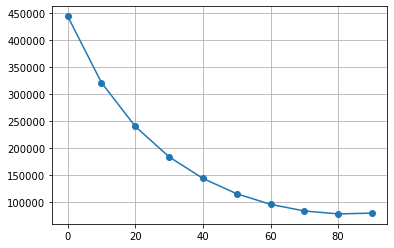

In [89]:
plt.plot(titas,np.array(dzs).real,'-o')
plt.grid(True)

In [184]:
# barrido en angulo y frecuencia

frecs=np.array([1e3,10e3,100e3,1e6])
Dz=[]

for frec in frecs:
    dzs=[]
    for tita in titas:
        tita=math.radians(tita)
        coil=[r1,r2,l,n,tita,x0,y0,l0]
        dzs.append(delta_z(coil,frec))
    Dz.append(dzs)

In [187]:
sfrecs=['1kHz','10kHz','100kHz','1MHz']

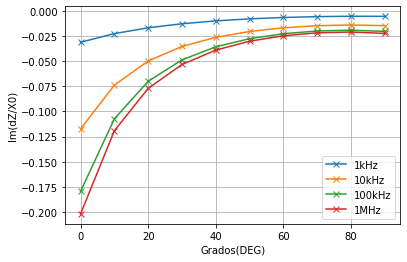

In [196]:
plt.plot(titas,np.array(Dz[0]/X0[0]).imag,'-x')
plt.plot(titas,np.array(Dz[1]/X0[1]).imag,'-x')
plt.plot(titas,np.array(Dz[2]/X0[2]).imag,'-x')
plt.plot(titas,np.array(Dz[3]/X0[3]).imag,'-x')
plt.legend(sfrecs)
plt.ylabel('Im(dZ/X0)')
plt.xlabel('Grados(DEG)')

plt.grid(True)

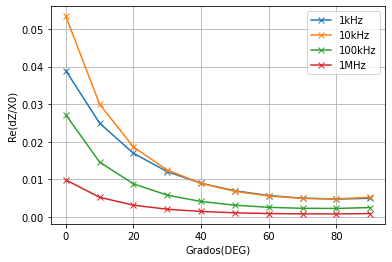

In [197]:
plt.plot(titas,np.array(Dz[0]/X0[0]).real,'-x')
plt.plot(titas,np.array(Dz[1]/X0[1]).real,'-x')
plt.plot(titas,np.array(Dz[2]/X0[2]).real,'-x')
plt.plot(titas,np.array(Dz[3]/X0[3]).real,'-x')
plt.legend(sfrecs)
plt.ylabel('Re(dZ/X0)')
plt.xlabel('Grados(DEG)')

plt.grid(True)